## Text Classification--Naive Bayes Classifier

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### data contains 2000 rows of complaints received by different city groups through mayor's hotline
### columns are words in the complaints

In [31]:
data = pd.read_csv('/Users/yi/Desktop/Internships/project/统计计算/DataClear.csv',encoding='gbk')
data.head()

,单位名称,换车,商户,吉林大路,还在,给出,安全标准,地,是因为,东北师范大学,...,绿园,门将,研究所,世纪家园,水务,提醒,照,煦,煤,后门
0,市供热公司,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,市水务集团,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,市水务集团,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,市燃气集团,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,市公交集团,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
data['单位名称'].unique() 

array(['市供热公司', '市水务集团', '市燃气集团', '市公交集团', '市房地集团', '市运输管理局', '市供电公司'],
      dtype=object)

Text(0.5, 1.0, 'number of complaints received by different city groups')

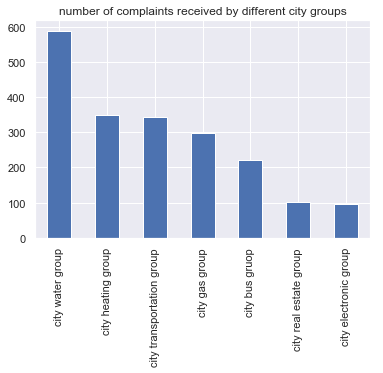

In [33]:
dict_companynames = {'市供热公司':'city heating group',
        '市水务集团':'city water group',
        '市燃气集团':'city gas group',
        '市公交集团':'city bus gruop',
        '市房地集团':'city real estate group',
        '市运输管理局':'city transportation group',
        '市供电公司':'city electronic group'
        }
data['单位名称'].replace(dict_companynames,inplace=True)
#plot histogram of number of complaints received by different city groups
data['单位名称'].value_counts().plot.bar()
plt.title('number of complaints received by different city groups')

#### we see that city water group has received most complaints and city electronic group has received the least

Text(0.5, 1.0, 'number of words in one complaint')

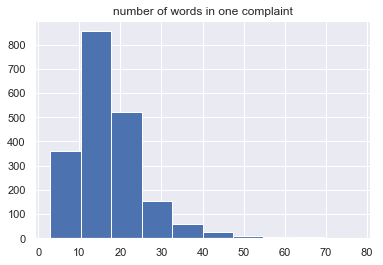

In [34]:
# plot histogram of number of words in one complaint
plt.hist((data == 1).sum(axis=1))
plt.title('number of words in one complaint')

#### number of words used in one complaint is not very large, less than 40 basicly.
#### the distribution has apparent right deviation.

In [35]:
data['number of words'] = (data == 1).sum(axis=1)

In [36]:
data.head()

,单位名称,换车,商户,吉林大路,还在,给出,安全标准,地,是因为,东北师范大学,...,门将,研究所,世纪家园,水务,提醒,照,煦,煤,后门,number of words
0,city heating group,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
1,city water group,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
2,city water group,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20
3,city gas group,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
4,city bus gruop,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11


In [37]:
datawordsnum = pd.DataFrame(columns=data['单位名称'].unique(),index=data.index)
datawordsnum['city heating group'] = data[data['单位名称']=='city heating group']['number of words']
datawordsnum['city water group'] = data[data['单位名称']=='city water group']['number of words']
datawordsnum['city gas group'] = data[data['单位名称']=='city gas group']['number of words']
datawordsnum['city bus group'] = data[data['单位名称']=='city bus group']['number of words']
datawordsnum['city real estate group'] = data[data['单位名称']=='city real estate group']['number of words']
datawordsnum['city transportation group'] = data[data['单位名称']=='city transportation group']['number of words']
datawordsnum['city electronic group'] = data[data['单位名称']=='city electronic group']['number of words']

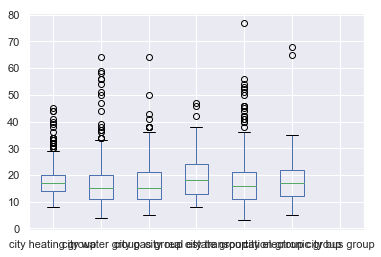

In [38]:
datawordsnum.boxplot()

#### There is no obvious difference among the number of words used in complaints for different groups

### Mathematical model of Classifier

#### Given set C = {y$_1$, y$_2$,..., y$_n$} and set I = {x$_1$, x$_2$,..., x$_n$,...}, make projection rule as y = f(x). For any x$_i$ belongs to set I, there exists and has only one y$_i$ in set C that make f(x$_i$) = y$_i$ true. There are i different classes, and x$_i$ are element that needs to be classified. f here is call a classifier.

### Bayes Theorem

#### $$ P( B | A ) = P( A | B )\cdot P( B ) /P( A ) $$
#### This theorem tells us that we can use the prior probability P( A | B ) and the probability of P ( A ) as well as  P( B ) to calculate the posterior probability P ( B | A ).

### The definition and process of Naive Bayes Model

#### The definition of a Naive Bayes Model is as follows:
#### (1) denote x = {a$_1$, a$_2$,..., a$_m$} as an element needs to be classified, and every a$_i$ is a feature attribute of x;
#### (2) denote set of classes C = {y$_1$, y$_2$,..., y$_n$};
#### (3) calculate P( y$_1$ | x ), P( y$_2$ | x ),..., P( y$_n$ | x );
#### (4) if P( y$_k$ | x ) = max{P( y$_1$ | x ), P( y$_2$ | x ),..., P( y$_n$ | x )}, then x belongs to y$_k$.

#### The most important part is to calculate conditional probability in the third line. We can do it this way:
#### (1) find a set of x that we already know which classes they belong to, and this set is called the training set;
#### (2) obtain the probability of each feature conditioning on different classes y:
#### P( a$_1$ | y$_1$ ), P( a$_2$ | y$_1$ ),..., P( a$_m$ | y$_1$ )
#### P( a$_1$ | y$_2$ ), P( a$_2$ | y$_2$ ),..., P( a$_m$ | y$_2$ )
#### ...
#### P( a$_1$ | y$_n$ ), P( a$_2$ | y$_n$ ),..., P( a$_m$ | y$_n$ )
#### (3) assume all features are independent and according to Bayes formula, we can get:
#### $$ P( y_i | x ) = P( x | y_i )\cdot P( y_i )/P( x )$$
#### since the denominator is a constant number for all classes, what we need to do is to maximum the numerator part:
#### $$ P( x | y_i )\cdot P( y_i ) = P( y_i )\prod_j P( a_j | y_i ) $$

### Train Naive Bayes Classification model

#### we wants to find $P( L | features ) = P( features | L )\cdot P( L ) / P( features ) $
#### posterior probability $ P(L_1 | features )/ P( L_2 | features ) = P( features | L_1 )\cdot P(L_1) / P( features | L_2 )\cdot P(L_2) $

#### try Gaussian Naive Bayes model, which assumes data can be described as Gaussian distribution

In [42]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_scor
import seaborn as sns; sns.set()
# init Gaussian Naive Bayes model
model = GaussianNB()

In [43]:
# split data into training set and testing set
x = data.iloc[:,1:-1]
y = data['单位名称']
xtrain, xtest, ytrain, ytest = train_test_split(x,y)

In [44]:
# use training data to train model
model.fit(xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [45]:
# obtain the probability of testing data belong to each different classes
yprob = model.predict_proba(xtest)
yprob

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [52]:
# get the predicted label of each row of testing data
labels = model.predict(xtest)
labels

array(['city gas group', 'city gas group', 'city water group',
       'city water group', 'city transportation group',
       'city electronic group', 'city transportation group',
       'city gas group', 'city transportation group', 'city water group',
       'city transportation group', 'city transportation group',
       'city water group', 'city gas group', 'city water group',
       'city gas group', 'city water group', 'city transportation group',
       'city transportation group', 'city water group',
       'city transportation group', 'city heating group',
       'city bus gruop', 'city bus gruop', 'city bus gruop',
       'city gas group', 'city gas group', 'city bus gruop',
       'city gas group', 'city water group', 'city water group',
       'city heating group', 'city transportation group',
       'city water group', 'city electronic group', 'city bus gruop',
       'city water group', 'city gas group', 'city water group',
       'city bus gruop', 'city water group', 'ci

In [72]:
# print the accuracy of prediction
print('accuracy: %s'%(accuracy_score(ytest,labels)*100)+'%')

accuracy: 86.8%


Text(0.5, 1.0, 'Confusion Matrix when using Gaussian Naive Bayes Model')

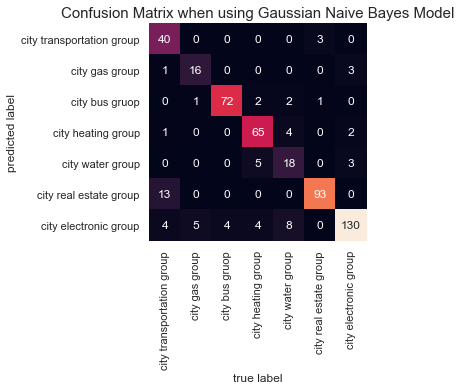

In [59]:
# draw the confusion matrix, see the accuracy of prediction for each class
mat = confusion_matrix(ytest,labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',cbar=False, xticklabels=ytrain.unique(),yticklabels=ytrain.unique())
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Confusion Matrix when using Gaussian Naive Bayes Model',fontsize=15)

In [79]:
# use cross validation and set the number of subsets of data equals to 6
from sklearn.model_selection import cross_val_score
cross_val_score(model,x,y,cv=6)

array([0.88130564, 0.84730539, 0.87987988, 0.89759036, 0.87650602,
       0.88554217])

#### for text classification, which includes the counts and frequency of each word appears in the complaints, Multinominal Naive Bayes can be more fittable

Text(0.5, 1.0, 'Confusion Matrix when using Multinomial Naive Bayes Model')

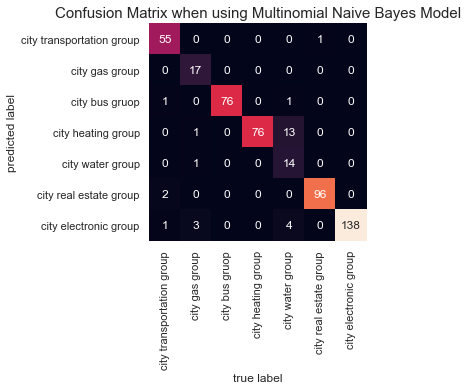

In [61]:
from sklearn.naive_bayes import MultinomialNB
model2 = MultinomialNB()
model2.fit(xtrain,ytrain)
labels2 = model2.predict(xtest)
mat2 = confusion_matrix(ytest,labels2)
sns.heatmap(mat2.T, square=True, annot=True, fmt='d',cbar=False, xticklabels=ytrain.unique(),yticklabels=ytrain.unique())
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Confusion Matrix when using Multinomial Naive Bayes Model',fontsize=15)

In [76]:
print('accuracy: %s'%(round(accuracy_score(ytest,labels2),2)*100)+'%')

accuracy: 94.0%


In [80]:
# use cross validation and set the number of subsets of data equals to 6
cross_val_score(model2,x,y,cv=6)

array([0.95845697, 0.94011976, 0.90690691, 0.96084337, 0.95783133,
       0.94879518])

#### we can see the accuracy is higher when using Multinomial Naive Bayes Model. However, there are still 13 test data that are classified to be in 'city heating group' which actually are 'city water group'. That's probably because the number of training data whose label is 'city water group' is relatively smaller.

### Improvements

#### When we use Naive Bayes Model to calculate the posterior probability, we assume that all features are independent.       
#### Therefore, if the probability of one of the features is equal to 0, then the total probability will be 0 as well. 
#### However, this is not that accurate when issuing real world problems. 

#### For one solution, we can use Semi-naive Bayes Model, which considers the interdependence of some attributes. It's a kind of relaxed classification of Bayesian classification. The most commonly used strategy is assuming that each attribute depends on only one of the other attributes, this relationship is called: One-Dependency Estimation (ODE).
#### Then the formula changes into $$ max{ P( y_i )\prod_j P( a_j | y_i, a_k ) } $$

#### For another solution, we use a very small number $ \lambda $ to take the place of 0 when the probability of the feature is equal to 0 and $\lambda$ is much smaller than any probability of features. In this way, we can avoid the mistakes taken by the probability of some features is 0.

### Adjusted Gaussian Naive Bayes Model

In [82]:
xadjust = x.copy().replace(0,0.0000001)

In [84]:
xadjusttrain, xadjusttest, yadjusttrain, yadjusttest = train_test_split(xadjust,y)

In [85]:
model.fit(xadjusttrain,yadjusttrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [86]:
labelsadjust = model.predict(xadjusttest)

In [87]:
# print the accuracy of prediction
print('accuracy: %s'%(accuracy_score(yadjusttest,labelsadjust)*100)+'%')

accuracy: 89.0%


Text(0.5, 1.0, 'Confusion Matrix when using adjusted Gaussian Naive Bayes Model')

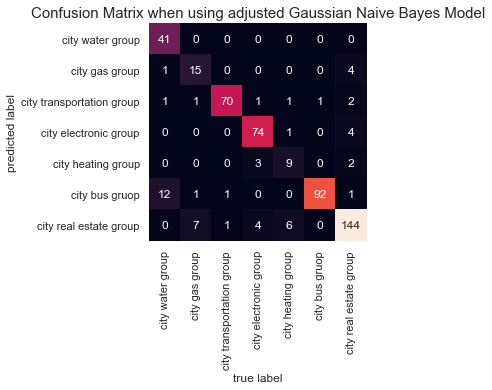

In [88]:
# draw the confusion matrix, see the accuracy of prediction for each class
matadjust = confusion_matrix(yadjusttest,labelsadjust)
sns.heatmap(matadjust.T, square=True, annot=True, fmt='d',cbar=False, xticklabels=yadjusttrain.unique(),yticklabels=yadjusttrain.unique())
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Confusion Matrix when using adjusted Gaussian Naive Bayes Model',fontsize=15)

In [89]:
# use cross validation and set the number of subsets of data equals to 6
cross_val_score(model,xadjust,y,cv=6)

array([0.88130564, 0.84730539, 0.87987988, 0.89759036, 0.87650602,
       0.88554217])

### Adjusted Multinomial Naive Bayes Model

accuracy: 95.8%
[0.95845697 0.94011976 0.90690691 0.96084337 0.95783133 0.94879518]


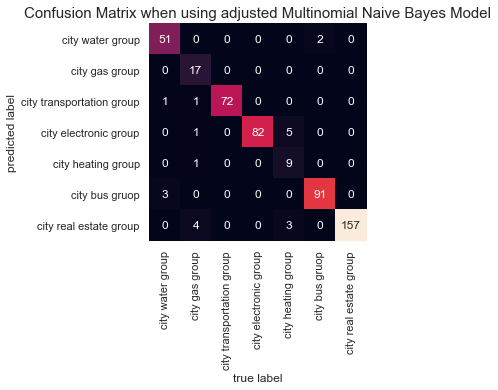

In [91]:
model2.fit(xadjusttrain,yadjusttrain)
labelsadjust2 = model2.predict(xadjusttest)
# print the accuracy of prediction
print('accuracy: %s'%(accuracy_score(yadjusttest,labelsadjust2)*100)+'%')
# draw the confusion matrix, see the accuracy of prediction for each class
matadjust2 = confusion_matrix(yadjusttest,labelsadjust2)
sns.heatmap(matadjust2.T, square=True, annot=True, fmt='d',cbar=False, xticklabels=yadjusttrain.unique(),yticklabels=yadjusttrain.unique())
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Confusion Matrix when using adjusted Multinomial Naive Bayes Model',fontsize=15)
# use cross validation and set the number of subsets of data equals to 6
print(cross_val_score(model2,xadjust,y,cv=6))

### Conclusion

#### we can see that the accuracy of prediction is much higher when using adjusted Naive Bayes Models.